In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.utils import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
basename,Returns the final component of a pathname
splitext,Split the extension from a pathname
expanduser,Expand ~ and ~user constructions
isabs,Test whether a path is absolute
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on


In [2]:
printhtml('<h3>Defining notebook variables</h3>')

# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
def setplotdefaults():
    plt.rcParams['figure.figsize'] = (6.29922, 6.29922)  # 16 cm
    plt.rcParams['lines.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
    plt.rcParams['figure.dpi'] = 300
    # So, here below we want just a way to use the same font for normal text and latex text
    # wrapped in $...$. Note that by default $...$ works, it's font family is simply unknown and
    # different from the rest of the text. Best could be if we could set ONE font faimly for all:
    # it turns out to be complex, because doing what it is suggested here:
    # https://matplotlib.org/3.1.1/tutorials/text/usetex.html:
    # raises a ! LaTeX Error: File `type1cm.sty' not found.
    # Googling it seems we need to install textlive extra, but the problem is that
    # BY DEFAULT $...$ WAS RENDERED! thus somehow matplolib must use some latex font with no extra install.
    # The solution is to disable:
    # 'text.usetext', 'font.serif' and 'font.sans-serif':
    # (if you want to restore the following, remember also to delete ~/.matplotlib/tex.cache)
    # plt.rcParams['text.usetex'] = True  # should be True by default, set for safety
    plt.rcParams['font.family'] = 'sans-serif'  # serif
    # plt.rcParams['font.serif'] = 'Computer Modern' #  'Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman'
    # plt.rcParams['font.sans-serif'] = 'Computer Modern' # 'Helvetica, Avant Garde, Computer Modern Sans serif'

    # plt.rcParams['font.family'] =   'STFangsong,Trebuchet MS,cmss10,InaiMathi,STHeiti,Microsoft Sans Serif,Arial Narrow,Tahoma,Andale Mono,Yu Gothic Medium,AppleGothic,Tahoma,DejaVu Sans,GungSeo,helvetica,arial'
    # plt.rcParams['font.weight'] = 'normal'
    # if set(plt.rcParams['font.family']) & set(['STFangsong',]):  # note: plt.rcParams['font.family'] has been converted to list
    #     plt.rcParams['font.weight'] = 900  # 'bold'

    # pandas settings. Some are set in `share`, display max_rows is explicitly set here
    pd.set_option('display.max_rows', 25)

setplotdefaults()

TRAINSET = 'allset_train.hdf'  # the first trainingset, without sod_dist
TRAINSET_U = 'uniform_train.hdf'  # the second trainingset, with sod_dist + uniform samples in (mag, dit) cells
TESTSETNAME1 = 'allset_test.hdf'  # the test of allset_train
TESTSETNAME2 = 'allset_unlabelled_annotation2.hdf'  # labelling by Bindi
TESTSETNAME_12 = 'allset_test_AND_allset_unlabelled_annotation2.hdf' # allset_test + labelling by Bindi
TESTSETNAME_UNLABELLED = 'allset_unlabelled.hdf'  # unlabelled stuff from allset_train and allset_test
TESTSETNAME_U = 'uniform_test.hdf'  # TESTNAME_12 + sod_dist

# columns to display for an Evaluation dataframe:
EVALDF_DISPLAYCOLUMNS = ['clf', 'feats', 'n_estimators', 'max_samples', 'random_state', 'average_precision_score',
                         'best_th_pr_curve', 'roc_auc_score', 'log_loss', 'relative_filepath',
                         # these are useless to show. The first is an experimental metric,
                         # the other three are parameters always equal for all models:
                         # 'best_th_roc_curve', 'behaviour', 'contamination',  'tr_set'
                        ]


from sod.core.paths import DATASETS_DIR


SAVE_FIGURES = False  # set to False to disable figures in the function below

def savefig(fig, name):
    '''Save a figure for the paper in a dedicated folder'''
    if not SAVE_FIGURES:
        print('(SAVE_FIGURES=False)')
        return
    root = os.path.expanduser('~')
    outpath = abspath(join(root, 'Nextcloud', 'rizac', 'outliers_paper', 'paper_figures'))
    assert isdir(outpath)
    outpath = join(outpath, name + '.png')
    # printhtml('Saving figure to "~/%s"' % os.path.relpath(abspath(outpath), root))
    printhtml(f'Saving figure to "~/{os.path.relpath(abspath(outpath), root)}" ')
    printhtml(f'(dpi: {plt.rcParams["figure.dpi"]} '
              f'size[w,h]: {plt.rcParams["figure.figsize"][0]:.2f} {plt.rcParams["figure.figsize"][1]:.2f})')
    fig.savefig(outpath, dpi=plt.rcParams['figure.dpi'], format='png')
    # join(dirname(dirname(dirname(os.getcwd())))

import yaml
from stream2segment.process.db import get_session, Segment, Station, Event, loads_inv, Base 

from obspy.signal.spectral_estimation import PPSD

def ppsd(raw_trace, inventory, periods=None):
    '''Returns the arrays
        periods, amplitudes_db
    Where amplitudes are the computed PSD (power spectral density)
    if the argument `periods` is not None but an array or scalar (in seconds), returns:
        periods, amplitudes_db_interpolated_on_periods
    '''
    try:
        # ppsd_ = psd(raw_trace, inventory)
        dt = raw_trace.stats.endtime - raw_trace.stats.starttime  # total_seconds
        ppsd_ = PPSD(raw_trace.stats, metadata=inventory, ppsd_length=int(dt))
        ppsd_.add(raw_trace)
    except Exception as esc:
        raise ValueError('%s error when computing PSD: %s' %
                         (esc.__class__.__name__, str(esc)))
    # check first if we can interpolate ESPECIALLY TO SUPPRESS A WEIRD
    # PRINTOUT (numpy?): something like '5064 5062' which happens
    # on IndexError (len(ppsd_.psd_values)=0)
    if not len(ppsd_.psd_values):
        raise ValueError('Expected 1 psd array, no psd computed')
    x, y = ppsd_.period_bin_centers, ppsd_.psd_values[0]
    if periods is None:
        return x, y
    periods = np.asarray(periods)
    newy = np.interp(np.log10(periods), np.log10(x), y)
    if np.ndim(newy) > 0:
        newy[periods < x[0]] = np.nan
        newy[periods > x[-1]] = np.nan
    return x, newy

print('done')

Defining notebook variables

done


In [3]:
printhtml('<h3>Loading evaluation dataframe</h3>')
eval_df = read_eval_df('evaluationmetrics.hdf') #  read_summary_eval_df()

for setname in [TESTSETNAME_U, TESTSETNAME_12]:
    print()
    printhtml('<h4>Testset: "%s". Best models under "average precision score" (APS)</h4>' % setname)
    display(eval_df[eval_df.relative_filepath.str.endswith(os.sep + setname)].
            sort_values(['average_precision_score'], ascending=False)[EVALDF_DISPLAYCOLUMNS])

Loading evaluation dataframe

Testset: "uniform_test.hdf". Best models under "average precision score" (APS)

,clf,feats,n_estimators,max_samples,random_state,average_precision_score,best_th_pr_curve,roc_auc_score,log_loss,relative_filepath
1607,IsolationForest,psd@5sec,50,512,25,0.971079,0.730038,0.976689,0.590869,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=50&random_state=25/uniform_test.hdf
1605,IsolationForest,psd@5sec,100,512,25,0.970786,0.741438,0.976366,0.597247,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=25/uniform_test.hdf
1594,IsolationForest,psd@5sec,100,1024,25,0.970586,0.752108,0.975150,0.581386,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=25/uniform_test.hdf
1592,IsolationForest,psd@5sec,100,1024,11,0.970564,0.739007,0.975348,0.577372,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/uniform_test.hdf
1104,IsolationForest,psd@5sec,100,1024,42,0.970494,0.745727,0.975156,0.574587,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/uniform_test.hdf
1604,IsolationForest,psd@5sec,100,512,11,0.970490,0.743559,0.975866,0.604658,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=11/uniform_test.hdf
1105,IsolationForest,psd@5sec,50,1024,42,0.970405,0.737435,0.975189,0.579604,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/uniform_test.hdf
1598,IsolationForest,psd@5sec,50,2048,25,0.970360,0.716539,0.974505,0.560193,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=25/uniform_test.hdf
1597,IsolationForest,psd@5sec,100,2048,25,0.970295,0.714902,0.974611,0.563666,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=25/uniform_test.hdf
1599,IsolationForest,psd@5sec,50,2048,11,0.970213,0.737760,0.975100,0.559445,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/uniform_test.hdf


Testset: "allset_test_AND_allset_unlabelled_annotation2.hdf". Best models under "average precision score" (APS)

,clf,feats,n_estimators,max_samples,random_state,average_precision_score,best_th_pr_curve,roc_auc_score,log_loss,relative_filepath
830,IsolationForest,psd@5sec,100,2048,42,0.970866,0.746330,0.974132,0.606184,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=42/allset_test_AND_allset_unlabelled_annotation2.hdf
842,IsolationForest,psd@5sec,200,4096,25,0.970687,0.718142,0.974026,0.588646,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=200&random_state=25/allset_test_AND_allset_unlabelled_annotation2.hdf
843,IsolationForest,psd@5sec,50,4096,11,0.970605,0.726551,0.974377,0.587202,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf
833,IsolationForest,psd@5sec,200,2048,42,0.970577,0.746689,0.974144,0.607408,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=200&random_state=42/allset_test_AND_allset_unlabelled_annotation2.hdf
841,IsolationForest,psd@5sec,200,4096,42,0.970573,0.715107,0.973585,0.587802,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=200&random_state=42/allset_test_AND_allset_unlabelled_annotation2.hdf
840,IsolationForest,psd@5sec,200,4096,11,0.970509,0.718866,0.973985,0.590698,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=200&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf
828,IsolationForest,psd@5sec,100,2048,11,0.970464,0.756818,0.974035,0.610812,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf
831,IsolationForest,psd@5sec,200,2048,11,0.970408,0.746150,0.973771,0.610380,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=200&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf
858,IsolationForest,psd@5sec,200,8192,11,0.970393,0.688365,0.973803,0.579433,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=8192&n_estimators=200&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf
834,IsolationForest,psd@5sec,50,2048,11,0.970364,0.757912,0.973979,0.614826,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/allset_test_AND_allset_unlabelled_annotation2.hdf


In [4]:
setname = TESTSETNAME_U

printhtml('<h3>Plotting best models in details. All metrics computed on test set "%s"</h3>' % setname)


printhtml('<h4>Grouping models by (n_estimators, max_samples) and keeping those with median '
          'average precision score</h3>')

eval_df2 = []
for _, _df in eval_df[(eval_df.feats == 'psd@5sec') &
                      (eval_df.relative_filepath.str.endswith(os.sep + setname))].\
        groupby(['n_estimators', 'max_samples']):
    _df = _df[_df.average_precision_score == _df.average_precision_score.median()]
    # _df = _df[_df.random_state == 11]
    assert len(_df) == 1
    eval_df2.append(_df)
    # eval_df2.append(_df.sort_values('average_precision_score')[1:2])  # median
eval_df2 = pd.concat(eval_df2, axis=0, sort=False)

pd.set_option('display.max_rows', 500)
# display(eval_df.sort_values(['average_precision_score'], ascending=False).head(30))
display(eval_df2.sort_values(['average_precision_score'], ascending=False)[EVALDF_DISPLAYCOLUMNS])



printhtml('<h4>Calculating score ranges</h4>')

pdfs5 = np.append([-100000, 100000], np.arange(-140, -90, 0.001))
pdfs5 = pdfs5.reshape(len(pdfs5), 1)
e_df2 = eval_df2[['n_estimators', 'max_samples', 'random_state', 'average_precision_score', 'best_th_pr_curve', 'relative_filepath']]
e_df2.insert(3, 'max_score', np.nan)
e_df2.insert(3, 'min_score', np.nan)
e_df2.insert(3, 'scores_range', np.nan)

for rowtuple in e_df2.itertuples(index=True):
    clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
    zcorez = -clf.score_samples(pdfs5)
    # print(rowtuple.Index)
    e_df2.at[rowtuple.Index, 'min_score'] = np.nanmin(zcorez)
    e_df2.at[rowtuple.Index, 'max_score'] = np.nanmax(zcorez)
    e_df2.at[rowtuple.Index, 'scores_range'] = np.nanmax(zcorez) - np.nanmin(zcorez)
    


display(e_df2.sort_values(['scores_range'], ascending=False))

Plotting best models in details. All metrics computed on test set "uniform_test.hdf"

Grouping models by (n_estimators, max_samples) and keeping those with median average precision score

,clf,feats,n_estimators,max_samples,random_state,average_precision_score,best_th_pr_curve,roc_auc_score,log_loss,relative_filepath
1592,IsolationForest,psd@5sec,100,1024,11,0.970564,0.739007,0.975348,0.577372,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/uniform_test.hdf
1604,IsolationForest,psd@5sec,100,512,11,0.970490,0.743559,0.975866,0.604658,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=11/uniform_test.hdf
1599,IsolationForest,psd@5sec,50,2048,11,0.970213,0.737760,0.975100,0.559445,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/uniform_test.hdf
1596,IsolationForest,psd@5sec,100,2048,11,0.970131,0.723908,0.974888,0.559709,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/uniform_test.hdf
1595,IsolationForest,psd@5sec,50,1024,25,0.969853,0.739561,0.975201,0.574039,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/uniform_test.hdf
1602,IsolationForest,psd@5sec,100,4096,25,0.969622,0.680671,0.974166,0.556366,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=100&random_state=25/uniform_test.hdf
1606,IsolationForest,psd@5sec,50,512,11,0.968845,0.745870,0.975527,0.605512,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=50&random_state=11/uniform_test.hdf
1601,IsolationForest,psd@5sec,50,4096,11,0.968842,0.668166,0.973910,0.556683,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=11/uniform_test.hdf


Calculating score ranges

,n_estimators,max_samples,random_state,scores_range,min_score,max_score,average_precision_score,best_th_pr_curve,relative_filepath
1599,50,2048,11,0.444820,0.409164,0.853984,0.970213,0.737760,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/uniform_test.hdf
1601,50,4096,11,0.443304,0.417291,0.860595,0.968842,0.668166,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=11/uniform_test.hdf
1602,100,4096,25,0.437682,0.415391,0.853073,0.969622,0.680671,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=100&random_state=25/uniform_test.hdf
1596,100,2048,11,0.436862,0.413841,0.850702,0.970131,0.723908,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/uniform_test.hdf
1592,100,1024,11,0.427670,0.409846,0.837516,0.970564,0.739007,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/uniform_test.hdf
1595,50,1024,25,0.417206,0.410997,0.828203,0.969853,0.739561,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/uniform_test.hdf
1604,100,512,11,0.389067,0.421219,0.810286,0.970490,0.743559,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=11/uniform_test.hdf
1606,50,512,11,0.382259,0.425616,0.807875,0.968845,0.745870,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=50&random_state=11/uniform_test.hdf


Showing some scores normalizations

Linear

,old score,newscore
0,0.400,0.353
1,0.425,0.390
2,0.450,0.426
3,0.475,0.463
4,0.500,0.500
5,0.525,0.537
6,0.550,0.574
7,0.575,0.610
8,0.600,0.647
9,0.625,0.684


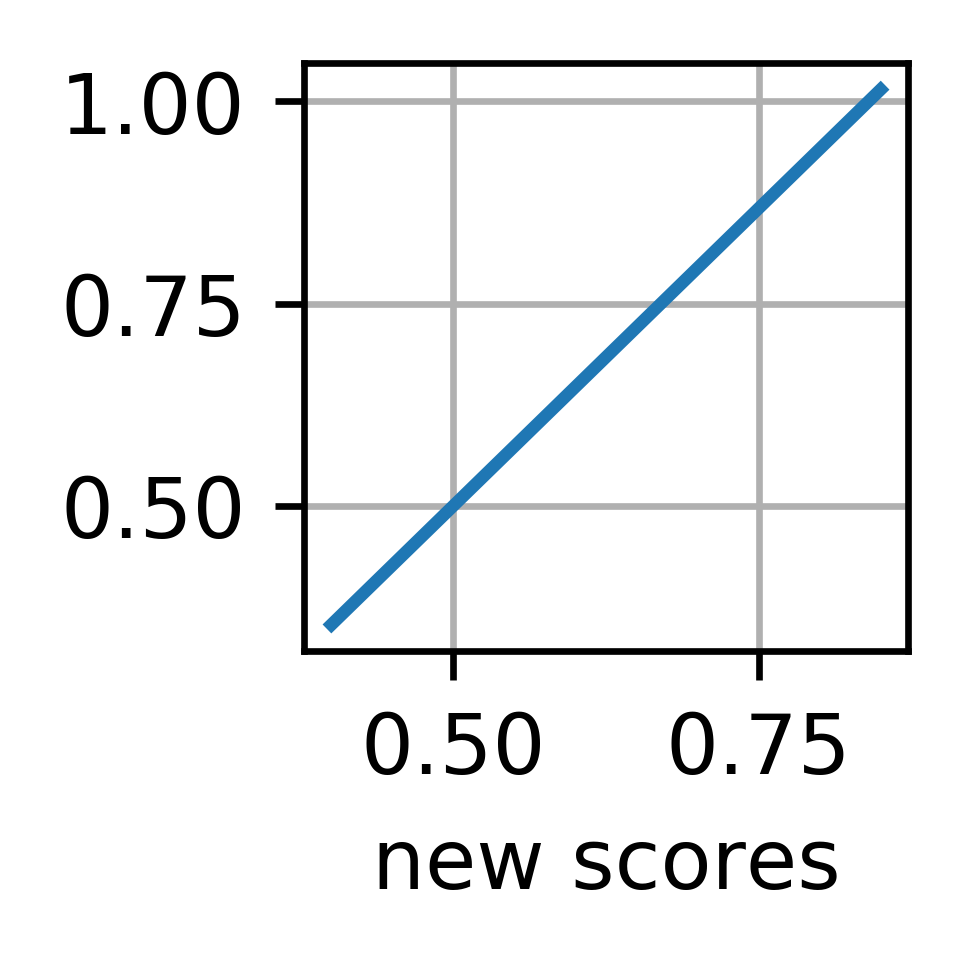

Inverse sigmoid

,old score,newscore
0,0.400,0.391
1,0.425,0.418
2,0.450,0.446
3,0.475,0.473
4,0.500,0.500
5,0.525,0.527
6,0.550,0.554
7,0.575,0.582
8,0.600,0.609
9,0.625,0.638


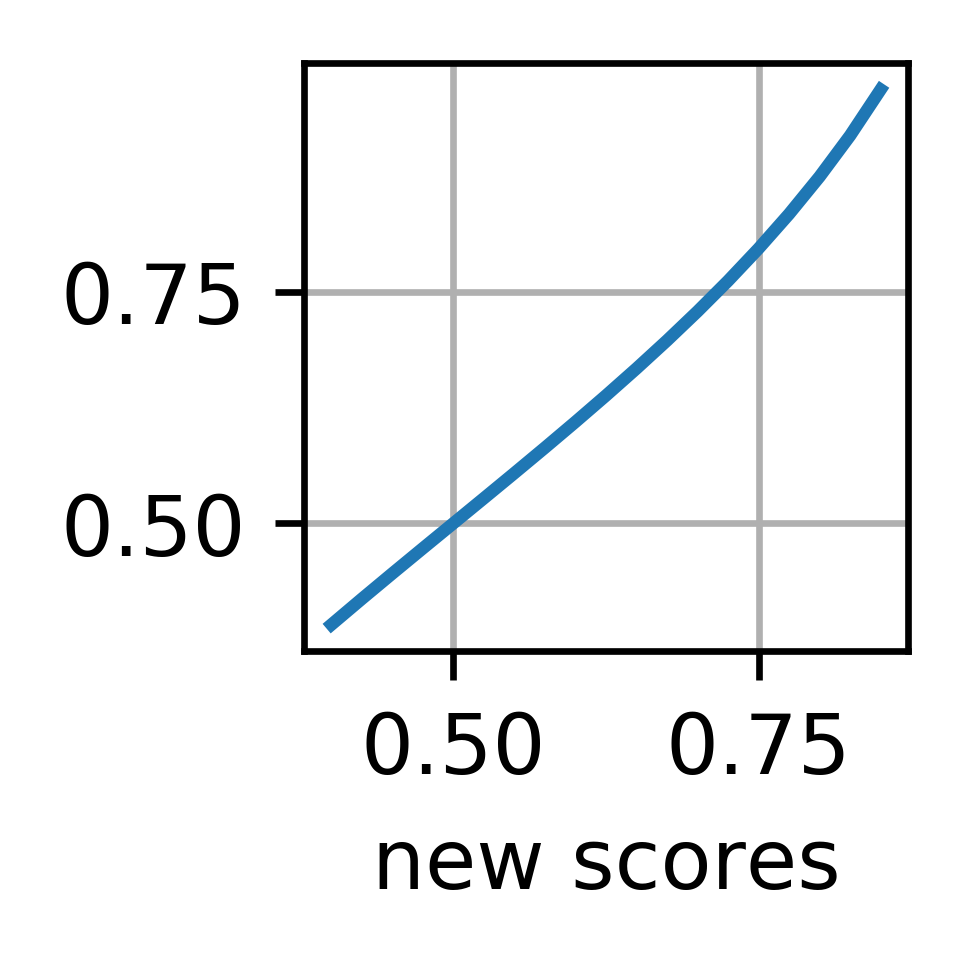

In [7]:
printhtml(f'<h3>Showing some scores normalizations</h3>')


# define score bounds (let's take them from the table above)
minscore, maxscore, stepscore, stepdecimals = 0.4, 0.84, 0.025, 3
zscores = np.arange(minscore, maxscore + stepscore, stepscore)

printhtml(f'<h4>Linear</h4>')

def mapping(scores):
    oldmin, newmin = 0.5, 0.5
    oldmax, newmax = maxscore, 1
    oldrange, newrange = (oldmax - oldmin), (newmax - newmin)
    return newmin + newrange * (np.asarray(scores) - oldmin) / oldrange

display(pd.DataFrame({'old score': zscores.round(stepdecimals), 'newscore': mapping(zscores).round(stepdecimals)}))

plt.rcParams['figure.figsize'] = (1.29922, 1.29922)
plt.plot(zscores, mapping(zscores))
plt.xlabel('old scores')
plt.xlabel('new scores')
plt.grid()
plt.show()


printhtml(f'<h4>Inverse sigmoid</h4>')

# the fitting for a inversed signoid is:
# mapping = a ln(x/(1-x)) + 0.5
# where a controls the "narrowness" of the curve

# assuming that we want mapping(best_th) = best_th:
# called best_th T:
# T ln(x/(1-x)) +0.5 = x
# T = (x-0.5) / (x / ln(1-x)) = (x-0.5) / (ln(x) - ln(1-x))

def best_th_to_signoid_pt(best_th):
    x = np.asarray(best_th)
    return (x-0.5) / (np.log(x) - np.log(1-x))

def mapping(scores, pt=0.2298622873):
    x = np.asarray(scores)
    # print(best_th_to_signoid_pt(pt))
    return pt * np.log(x/(1-x)) + 0.5


mappings = mapping(zscores, pt=0.25)
display(pd.DataFrame({'old score': zscores.round(stepdecimals), 'newscore': mappings.round(stepdecimals)}))

plt.rcParams['figure.figsize'] = (1.29922, 1.29922)
plt.plot(zscores, mappings)
plt.xlabel('old scores')
plt.xlabel('new scores')
plt.grid()
plt.show()

Plotting best models in details. All metrics computed on test set "uniform_test.hdf"

Grouping models by (n_estimators, max_samples) and keeping those with median average precision score

,clf,feats,n_estimators,max_samples,random_state,average_precision_score,best_th_pr_curve,roc_auc_score,log_loss,relative_filepath
1592,IsolationForest,psd@5sec,100,1024,11,0.970564,0.739007,0.975348,0.577372,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/uniform_test.hdf
1604,IsolationForest,psd@5sec,100,512,11,0.970490,0.743559,0.975866,0.604658,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=100&random_state=11/uniform_test.hdf
1599,IsolationForest,psd@5sec,50,2048,11,0.970213,0.737760,0.975100,0.559445,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=11/uniform_test.hdf
1596,IsolationForest,psd@5sec,100,2048,11,0.970131,0.723908,0.974888,0.559709,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=100&random_state=11/uniform_test.hdf
1595,IsolationForest,psd@5sec,50,1024,25,0.969853,0.739561,0.975201,0.574039,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/uniform_test.hdf
1602,IsolationForest,psd@5sec,100,4096,25,0.969622,0.680671,0.974166,0.556366,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=100&random_state=25/uniform_test.hdf
1606,IsolationForest,psd@5sec,50,512,11,0.968845,0.745870,0.975527,0.605512,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=512&n_estimators=50&random_state=11/uniform_test.hdf
1601,IsolationForest,psd@5sec,50,4096,11,0.968842,0.668166,0.973910,0.556683,clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=11/uniform_test.hdf


Defining plot function and plotting

Plotting detailed model predictions with n_estimators=50

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

(SAVE_FIGURES=False)


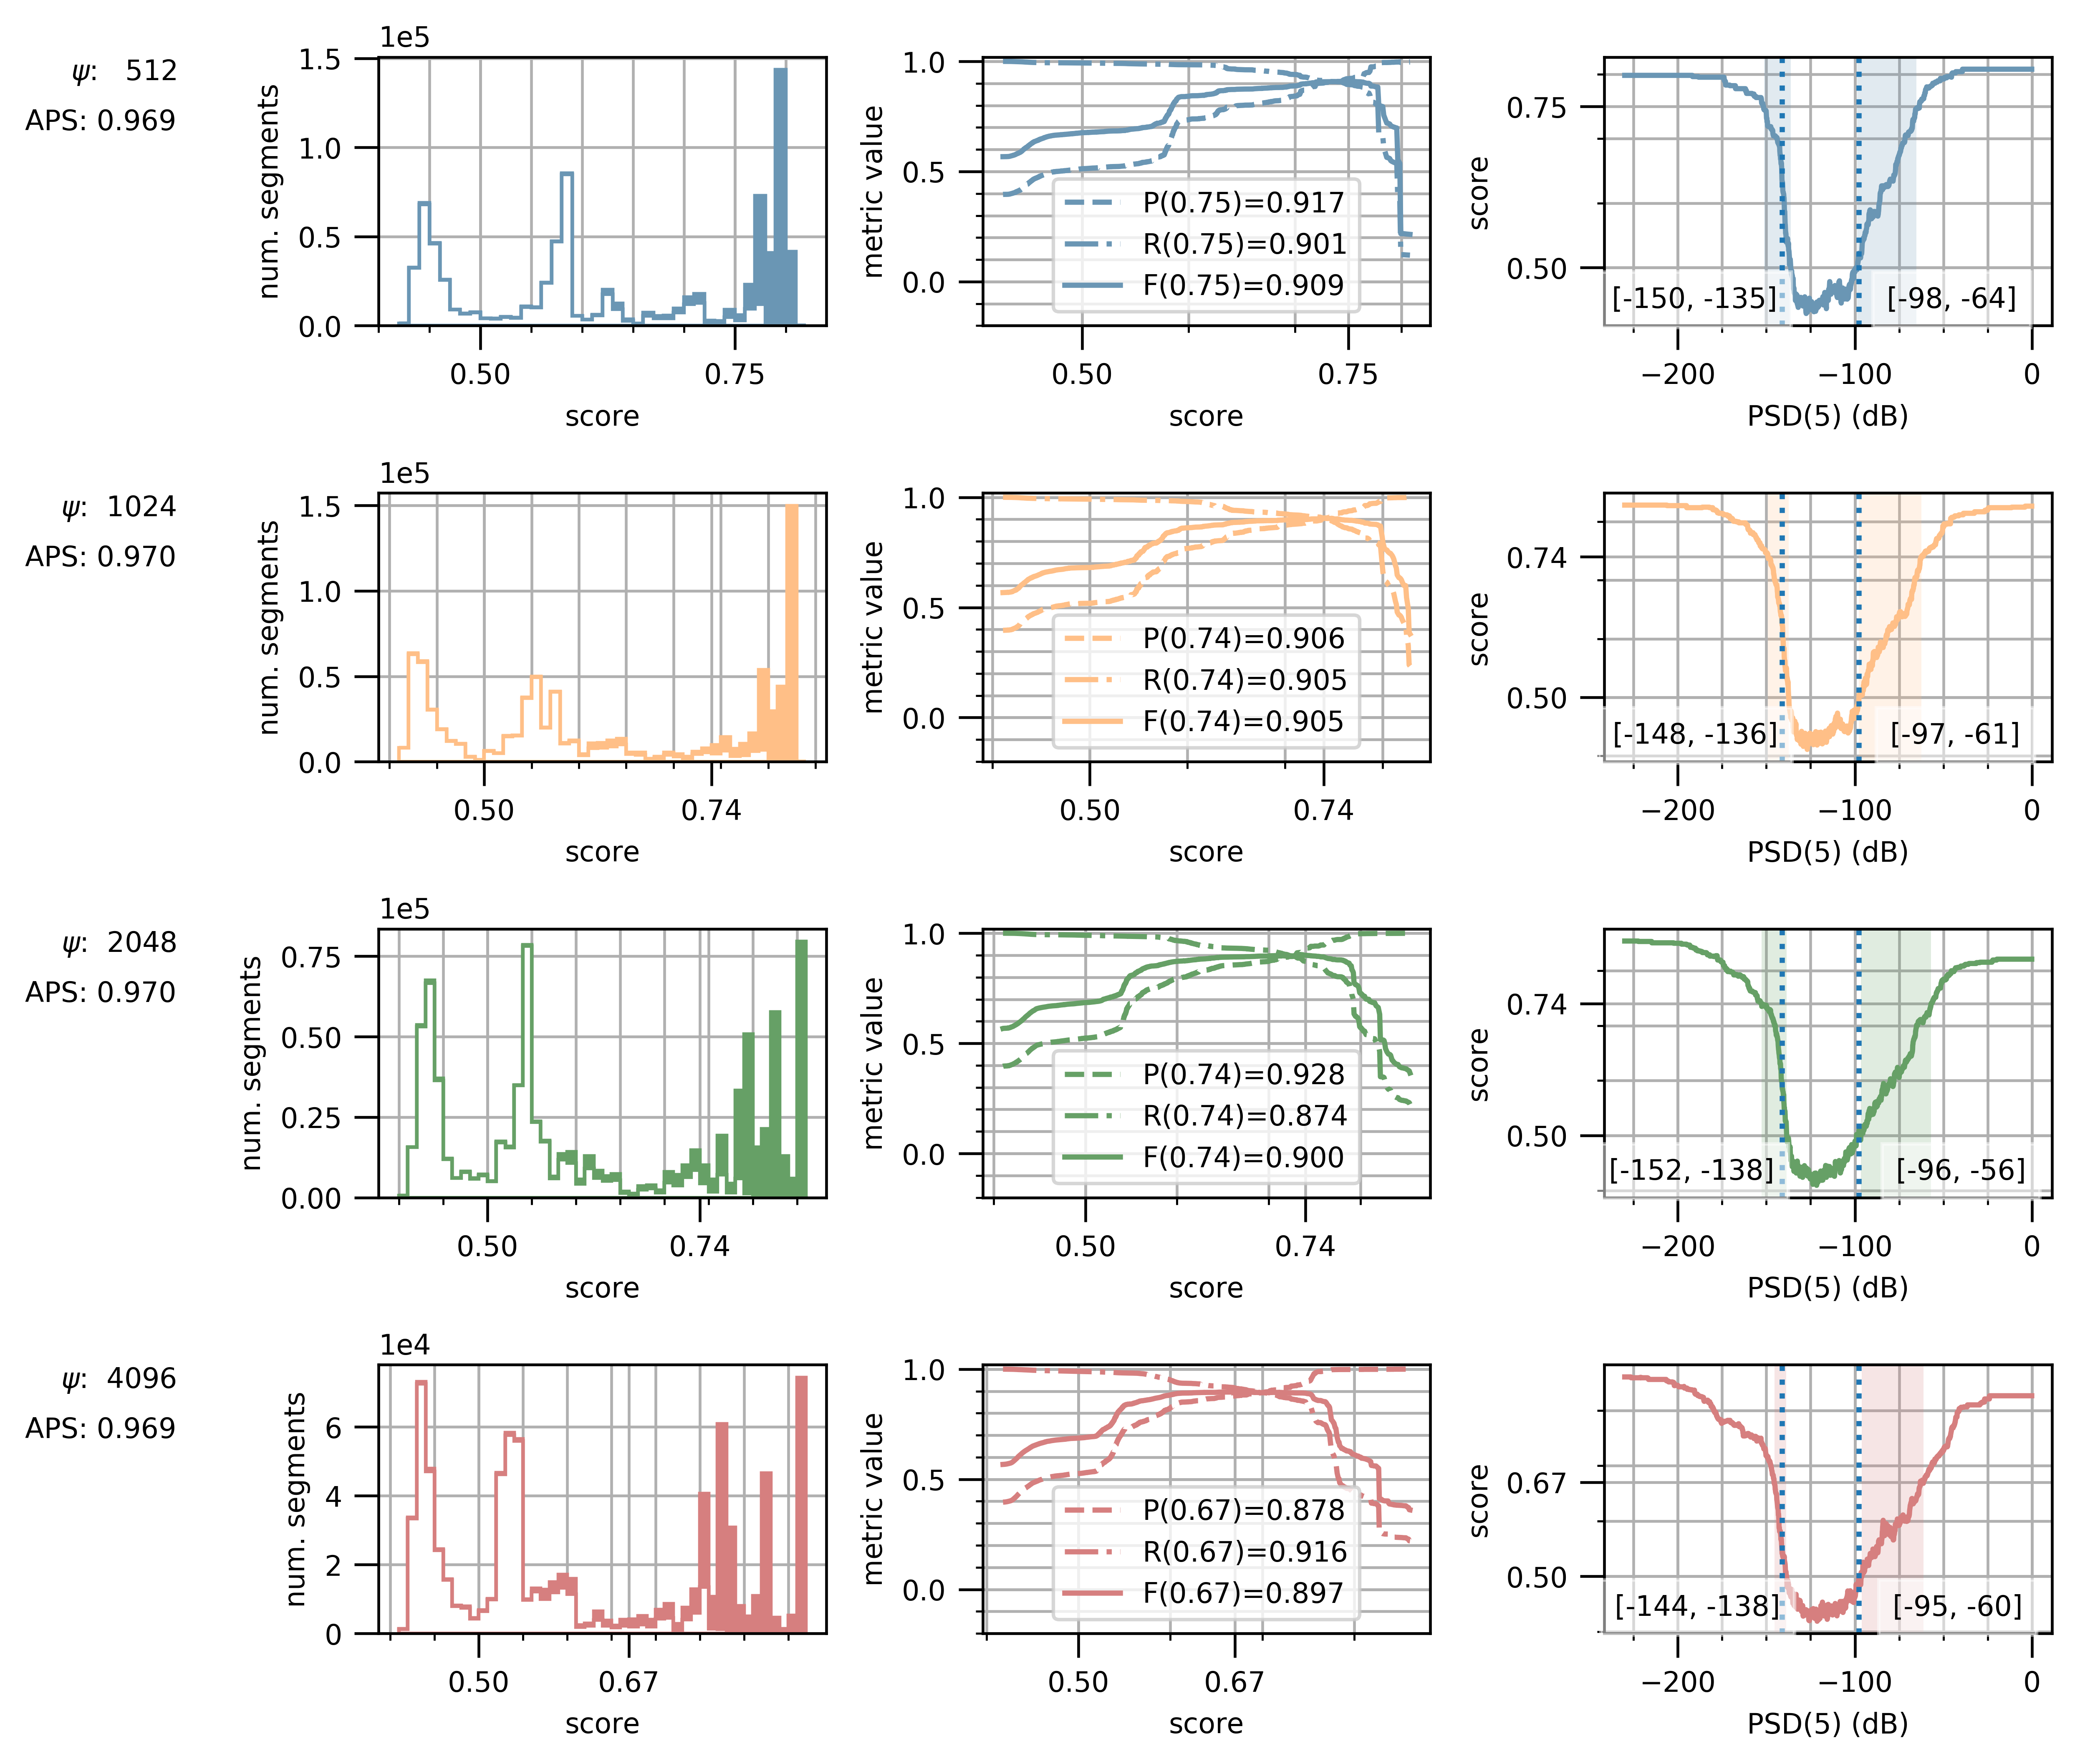

Plotting detailed model predictions with n_estimators=100

[●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●] 100.0% 0:00:00

(SAVE_FIGURES=False)


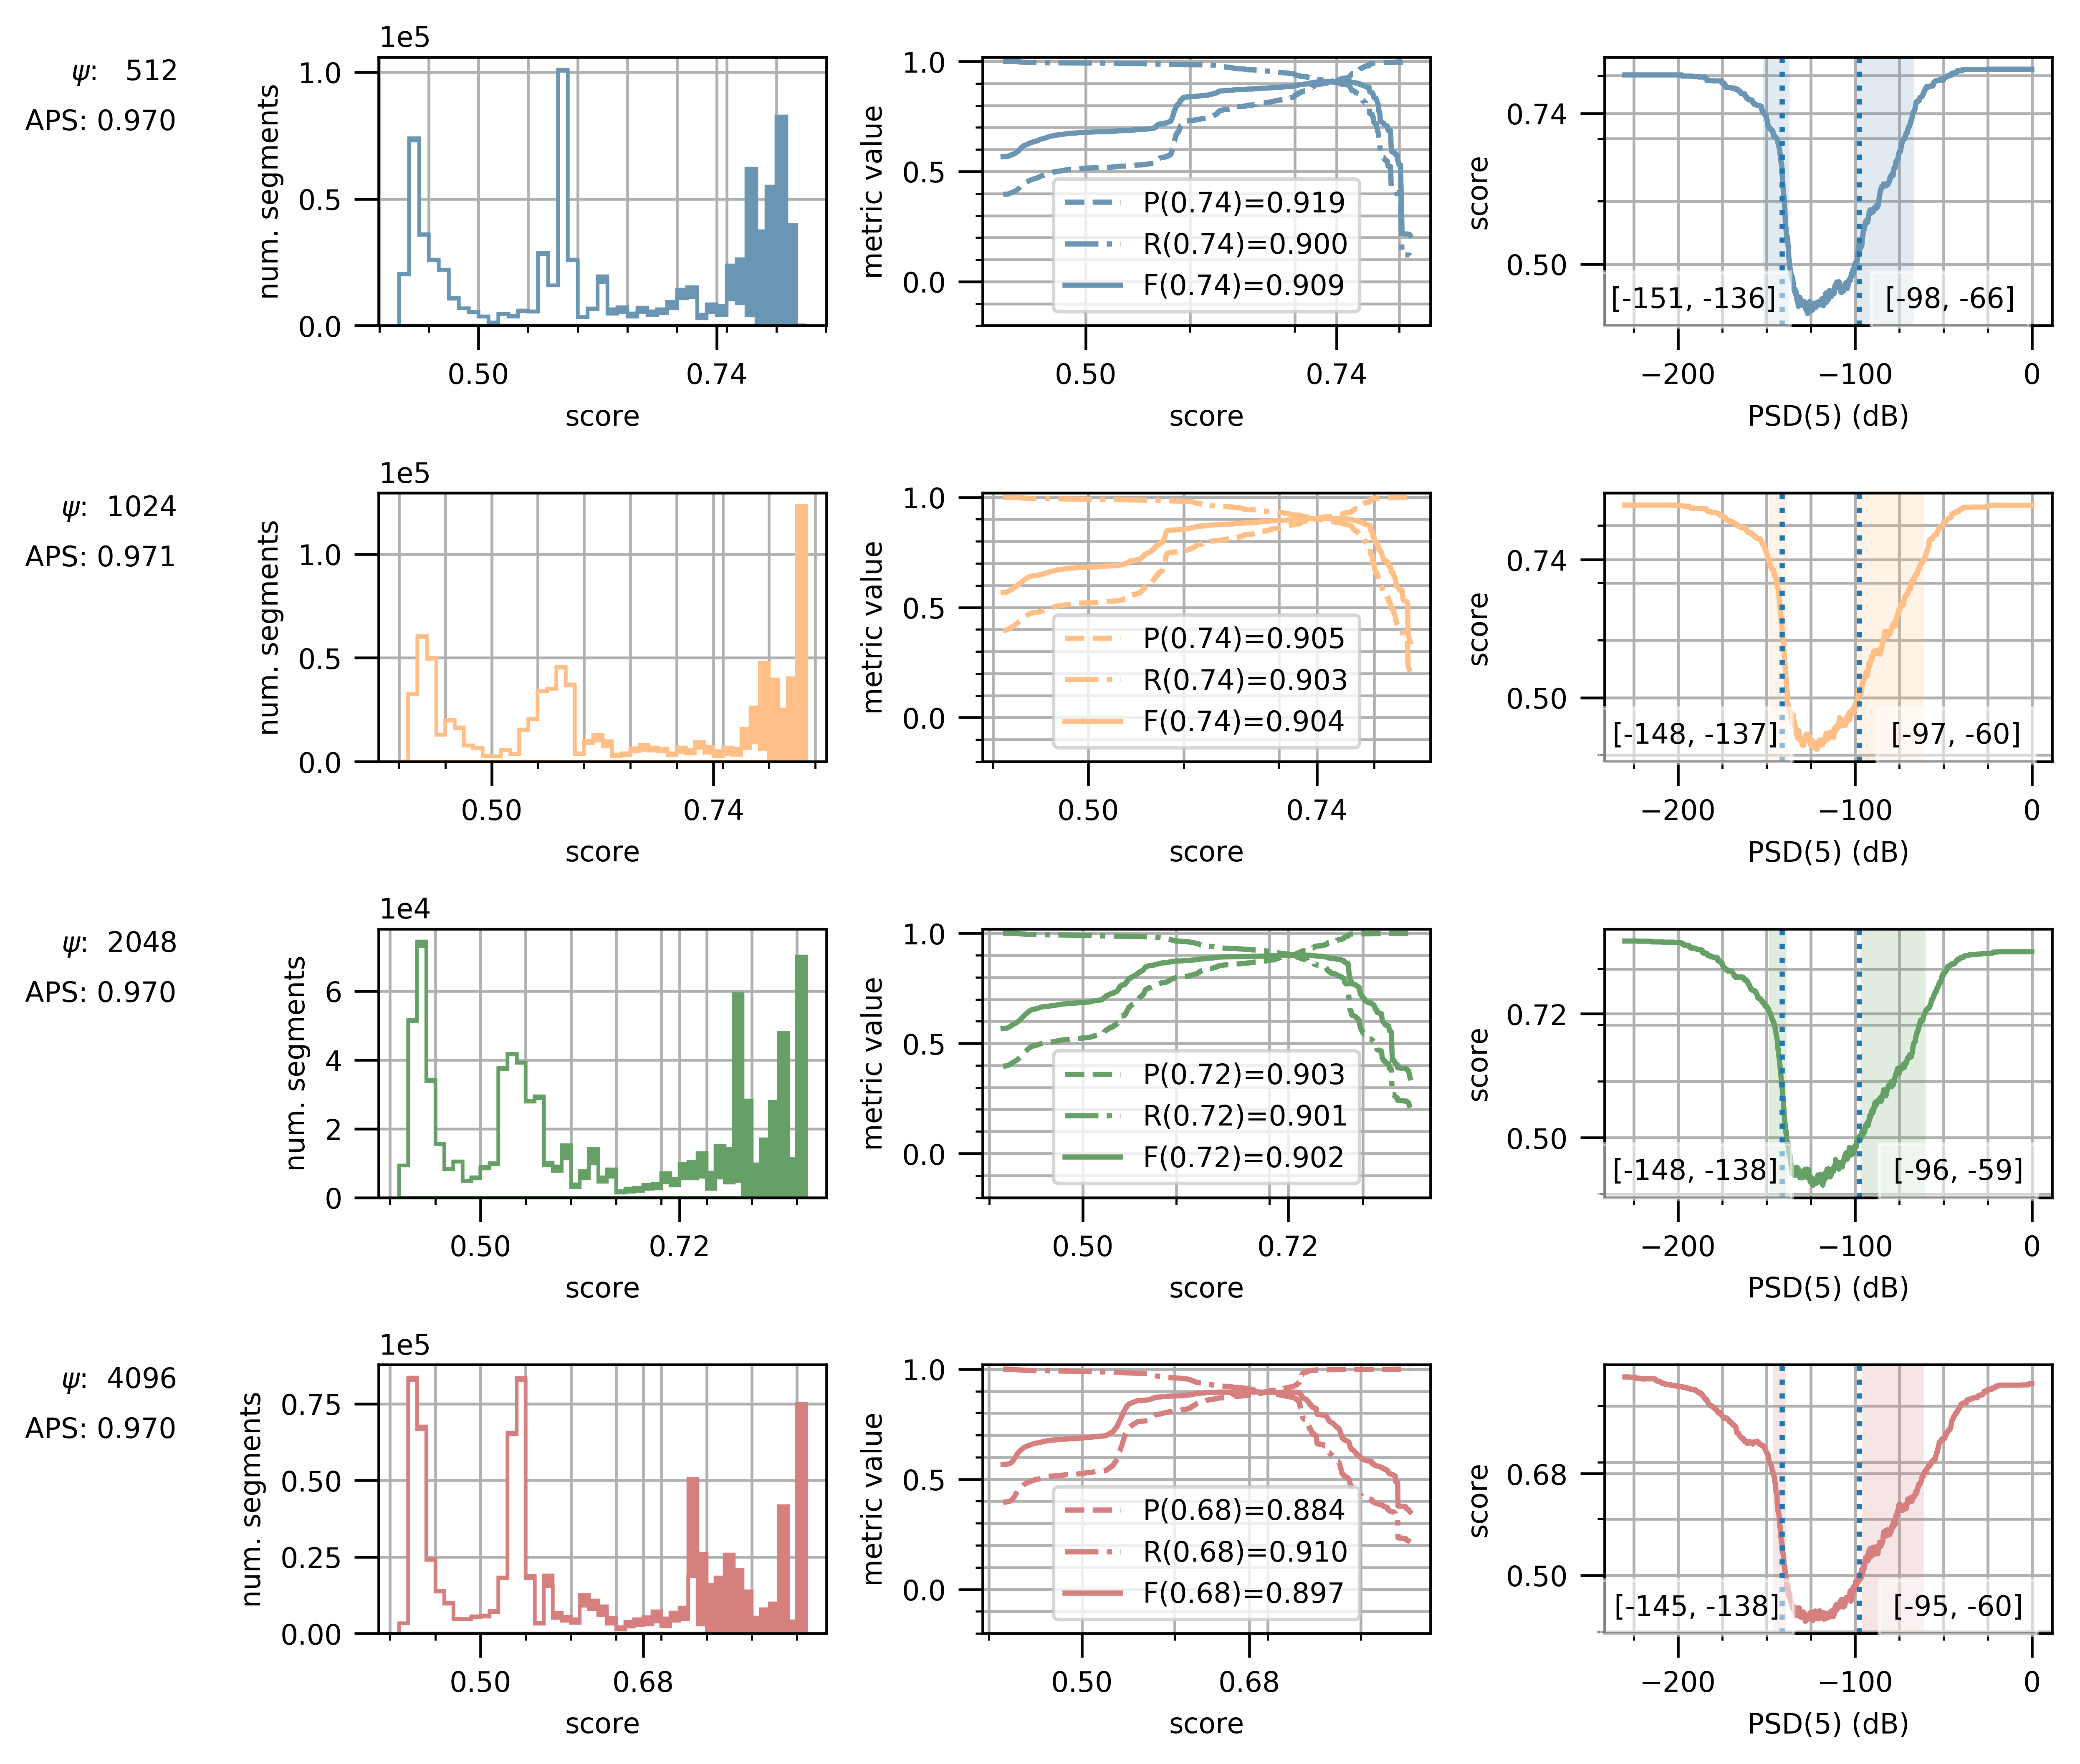

In [6]:
setplotdefaults()

setname = TESTSETNAME_U

printhtml('<h3>Plotting best models in details. All metrics computed on test set "%s"</h3>' % setname)


printhtml('<h4>Grouping models by (n_estimators, max_samples) and keeping those with median '
          'average precision score</h3>')

eval_df2 = []
for _, _df in eval_df[(eval_df.feats == 'psd@5sec') &
                      (eval_df.relative_filepath.str.endswith(os.sep + setname))].\
        groupby(['n_estimators', 'max_samples']):
    _df = _df[_df.average_precision_score == _df.average_precision_score.median()]
    # _df = _df[_df.random_state == 11]
    assert len(_df) == 1
    eval_df2.append(_df)
    # eval_df2.append(_df.sort_values('average_precision_score')[1:2])  # median
eval_df2 = pd.concat(eval_df2, axis=0, sort=False)

pd.set_option('display.max_rows', 500)
# display(eval_df.sort_values(['average_precision_score'], ascending=False).head(30))
display(eval_df2.sort_values(['average_precision_score'], ascending=False)[EVALDF_DISPLAYCOLUMNS])



printhtml('<h4>Defining plot function and plotting</h4>')

def plot_prediction_per_maxsamples(pred_dfs):
    
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)

    # printhtml('<h3>Summary plots n_estimators=200 only (and random_state=11)</h3>')

    PETTERSON_PERIOD = 5  # set to 0 to ignore

    rows, cols = len(pred_dfs), 4
    # rows, cols = 2*len(pred_dfs), 3
    fig = plt.figure(constrained_layout=True)
    gsp = fig.add_gridspec(rows, cols, width_ratios=[1,10, 10, 10])
    # gsp = fig.add_gridspec(rows, cols, height_ratios=[1,15] * len(pred_dfs))
    colors = get_colors(len(pd.unique([_.max_samples for _ in pred_dfs.keys()])))
    psdperiods = np.arange(-230, 0, 0.1)

    # axs_all = [[], [], []]
    for idx, (rowtuple, pred_df) in enumerate(pred_dfs.items()):
        title= "(max_s=%s)" % (rowtuple.max_samples)

        aps, p, r, th, f = EVALMETRICS.computeall(pred_df, EVALMETRICS.APS,
                                                  EVALMETRICS.PMAX, EVALMETRICS.RMAX,
                                                  EVALMETRICS.BEST_TH_PR, EVALMETRICS.F1MAX)

        axs = fig.add_subplot(gsp[idx, 1])
        mpl_hist_args = {
            'color': ['white', colors[idx]],
            'edgecolor':colors[idx],
            'histtype': 'stepfilled', 'stacked': True,
            # 'linewidth': 2
        }
        axs = plot_freq_distribution(pred_df, axs, title='', mpl_hist_args=mpl_hist_args)
        axs.set_xticks([0.5, np.round(th, 2)])
        axs.tick_params(which='major', length=7)
        axs.set_axisbelow(True)

        axs = fig.add_subplot(gsp[idx, 2])
        axs = plot_pre_rec_fscore(pred_df, axs, title='', mpl_plot_args={'color': colors[idx]})
        axs.tick_params(which='major', length=7)
        # bbox_to_anchor: A 2-tuple (x, y) places the corner of the legend specified by `loc` at x, y. 
        lgnd = axs.legend(loc='lower center', bbox_to_anchor=(0.5, 0))
        axs.set_ylim(-0.2, 1.02)
        axs.set_axisbelow(True)

        axs = fig.add_subplot(gsp[idx, 3])
        clf = load_clf(dirname(rowtuple.relative_filepath) + '.sklmodel')
        scores = -clf.score_samples(psdperiods.reshape(len(psdperiods), 1))
        # plot scores:
        axs.plot(psdperiods, scores, color=colors[idx])  # , linewidth=2)
        # plot petterson:
        pbounds = get_petterson_bounds(PETTERSON_PERIOD)
        axs.axvline(pbounds[0], linestyle=':')  # , linewidth=2)
        axs.axvline(pbounds[1], linestyle=':')  # , linewidth=2)
        # plot shaded areas between 0.5 and score optimizing f1score:
        indices1 = argwhere_array_equals_value(scores, th)
        indices2 = argwhere_array_equals_value(scores, 0.5)
        psd_l = psdperiods[indices1[0]], psdperiods[indices2[0]]
        axs.axvspan(psd_l[0], psd_l[1], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        psd_h = psdperiods[indices2[-1]], psdperiods[indices1[-1]]
        axs.axvspan(psd_h[0], psd_h[1], alpha=0.2, linestyle='--', linewidth=0, color=colors[idx])
        axs.grid()
        # displaying bounds:
        bound1 = str([int(psd_l[0]+0.5), int(psd_l[1]+0.5)])
        bound2 = str([int(psd_h[0]+0.5), int(psd_h[1]+0.5)])
        w1 = float(psd_l[1] - psd_l[0])
        w2 = float(psd_h[1] - psd_h[0])
        axs.text(psd_l[1] - w1/2.0, min(scores), bound1, ha='right', va='bottom', backgroundcolor=[1,1,1,0.5])
        axs.text(psd_h[0] + w2/2.0, min(scores), bound2, ha='left', va='bottom', backgroundcolor=[1,1,1,0.5])
        # set axis ticks:
        axs.xaxis.set_minor_locator(MultipleLocator(25))
        axs.yaxis.set_minor_locator(MultipleLocator(0.1))
        axs.grid(axis="both", which='minor', linestyle='-')
        axs.set_yticks([0.5, np.round(th, 2)])
        axs.tick_params(which='major', length=7)
        axs.set_xlabel('PSD(5) (dB)')
        axs.set_ylabel('score')
        axs.set_axisbelow(True)
        
        # summary in the leftmost plot:
        # plot it as last so we have all data avilable
        axs = fig.add_subplot(gsp[idx, 0])
        text = f'$\psi$: {rowtuple.max_samples:>5d}\nAPS: {aps:.3f}' # % (rowtuple.max_samples, aps)
        axs.text(0.5, 1, text, ha='right', va='top', rotation=0, linespacing=2)  # , family='monospace') 
        axs.set_axis_off()

    return fig

_f = plt.rcParams['font.size'] * .8
with rcparams({'font.size': _f, 'axes.titlesize': _f}, figsizeratio=(1.3, 1.1)):  #  {'font.size': 12}, hratio=.9):  # {'figure.figsize'] = (14, 16), plt.rcParams['font.size'] = 14
    for nest in [50, 100]:  # [50, 100, 200]:
        print()
        printhtml('<h4>Plotting detailed model predictions with n_estimators=%d</h4>' % nest)
        pred_dfs = get_pred_dfs(eval_df2[eval_df2.n_estimators == nest], columns=['predicted_anomaly_score', 'window_type', 'outlier', 'dataset_id'])
        # for _ in list(pred_dfs):
        #    pred_dfs[_] = pred_dfs[_][(pred_dfs[_].dataset_id==1) & ((pred_dfs[_].window_type))]
        fig = plot_prediction_per_maxsamples(pred_dfs)
        savefig(fig, 'feat5sec_allperfs_nest=%d' % nest)
        plt.show()